<a href="https://colab.research.google.com/github/sira4154/IRPC-Data-Scientist-Challenges/blob/main/IRPC_Data_Scientist_Challenge(Sira_Haruethaipree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the libraries

เริ่มแรกเราจะ import libraries ที่จำเป็นในการจัดการกับข้อมูลก่อนทั้ง numpy และ pandas โดยเราตั้งตัวย่อให้เห็น np และ pd  

In [1]:
import numpy as np
import pandas as pd

ทำการลิ้ง google colab เข้ากับ google drive ของเราเพื่อให้สามารถดึงไฟล์ข้อมูลได้

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ใช้ฟังก์ชั่น read_csv เพื่อทำการเปิดไฟล์ public_transporation_data 

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/public_transportation_data.csv',index_col= 0) #index_col = 0 for reject first index of dataset

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


หลังจากที่เรานำเข้าไฟล์มาเป็นที่เรียบร้อยเราจะมาดูว่า dataset ของเราเป็นยังไงตามด้านล่าง

In [4]:
dataset.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


  จะเห็นได้ว่าแถวที่ 5 คอลัมน์ price นั้นแสดงค่า NAN อยู่ซึ่งไม่สามาถนำมาคำนวณได้แล้วเราต้องทำการตัดออกจาก dataset ซึ่งในส่วนนี้จะอยู่ในขั้นตอน missing values

ต่อมาเราจะเช็คจำนวนของ dataset นี้

In [5]:
dataset.shape

(2579771, 9)

ซึ่ง dataset จะประกอบด้วย 2579771 แถว และมีทั้งหมด 9 คอลัมน์

## Data Preprocessing


###Check duplicate values 

ขั้นตอนแรกเราจะเช็คการซ้ำกันของข้อมูลก่อน ว่ามีซ้ำกันหรือไม่เพืาอไม่ให้ส่งผลต่อการทำโมเดล prediction 

In [6]:
sum(dataset.duplicated())

3516

หลังจากที่เราใช้ .duplicated() เพื่อเช็คข้อมูลที่ซ้ำกัน จะพบว่ามีทั้งหมด 3516 แถวที่ซ้ำกัน

เราจะทำการเข็คว่า data ที่ซ้ำกันนั้นมีการซ้ำกันจริงไหมโดยแสดงออกมาในรูป dataframe 

In [7]:
columns = dataset.columns # columns = ["insert_date","origin","destination","start_date","end_date","train_type","price","train_class","fare"]

In [8]:
duplicates = dataset.duplicated(subset=columns,keep=False) #keep = False : select all row that duplicated.
dataset[duplicates]

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
1095,2019-04-19 05:43:41,MADRID,VALENCIA,2019-05-31 15:10:00,2019-05-31 17:20:00,INTERCITY,38.80,Turista,Promo
1096,2019-04-19 05:43:41,MADRID,VALENCIA,2019-05-31 15:10:00,2019-05-31 17:20:00,INTERCITY,38.80,Turista,Promo
1562,2019-04-19 05:45:58,MADRID,VALENCIA,2019-05-10 15:10:00,2019-05-10 17:20:00,INTERCITY,43.75,Turista,Promo
1563,2019-04-19 05:45:58,MADRID,VALENCIA,2019-05-10 15:10:00,2019-05-10 17:20:00,INTERCITY,43.75,Turista,Promo
1753,2019-04-19 05:47:02,MADRID,VALENCIA,2019-04-30 15:10:00,2019-04-30 17:20:00,INTERCITY,55.40,Turista,Flexible
...,...,...,...,...,...,...,...,...,...
2579182,2019-04-19 05:25:51,VALENCIA,MADRID,2019-05-19 17:30:00,2019-05-19 19:43:00,INTERCITY,43.75,Turista,Promo
2579317,2019-04-19 05:26:38,VALENCIA,MADRID,2019-05-12 17:30:00,2019-05-12 19:43:00,INTERCITY,43.75,Turista,Promo
2579318,2019-04-19 05:26:38,VALENCIA,MADRID,2019-05-12 17:30:00,2019-05-12 19:43:00,INTERCITY,43.75,Turista,Promo
2579453,2019-04-19 05:27:26,VALENCIA,MADRID,2019-05-05 17:30:00,2019-05-05 19:43:00,INTERCITY,NaN,Turista,Flexible


จากตารางด้านบนถ้าดูคร่าวๆจะเห็นได้ว่ามีการซ้ำกันจริงของข้อมูล เพราะฉะนั้นเราจะใช้ฟังก์ชั่น drop เพื่อนำค่าที่ซ้ำกันออก

In [9]:
dataset.drop_duplicates(subset=columns,inplace=True)

หลังจากที่เราทำการ drop หรือนำค่าที่ซ้ำกันออกแล้ว ก็ทำการเช็คการซ้ำกันของข้อมูลอีกครั้ง

In [10]:
sum(dataset.duplicated())

0

เมื่อเช็คแล้วค่าที่ได้เป็น 0 แสดงว่าเราได้ทำการกำจัดค่าที่ซ้ำกันออกเรียบร้อย

##Check missing values

ในส่วนนี้เราจะกำจัด missing values ค่าที่ปรากฏว่า NAN ในDataframe เพื่อไม่ให้มีผลต่อการทำนาย หรือ การสร้างโมเดล predict

In [11]:
dataset.isna().sum()

insert_date         0
origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          309751
train_class      9664
fare             9664
dtype: int64

จากด้านบนเราจะเห็นว่าจากการเช็คค่า missing value มีจำนวนทั้งหมด 309751 ค่าที่คอลัมน์ price และ คอลัมน์ train_class กับ fare ก็มี missing values 9664 จุด  

เราจะใช้ Library msno เพื่อทำการ visualize ค่า missing value 

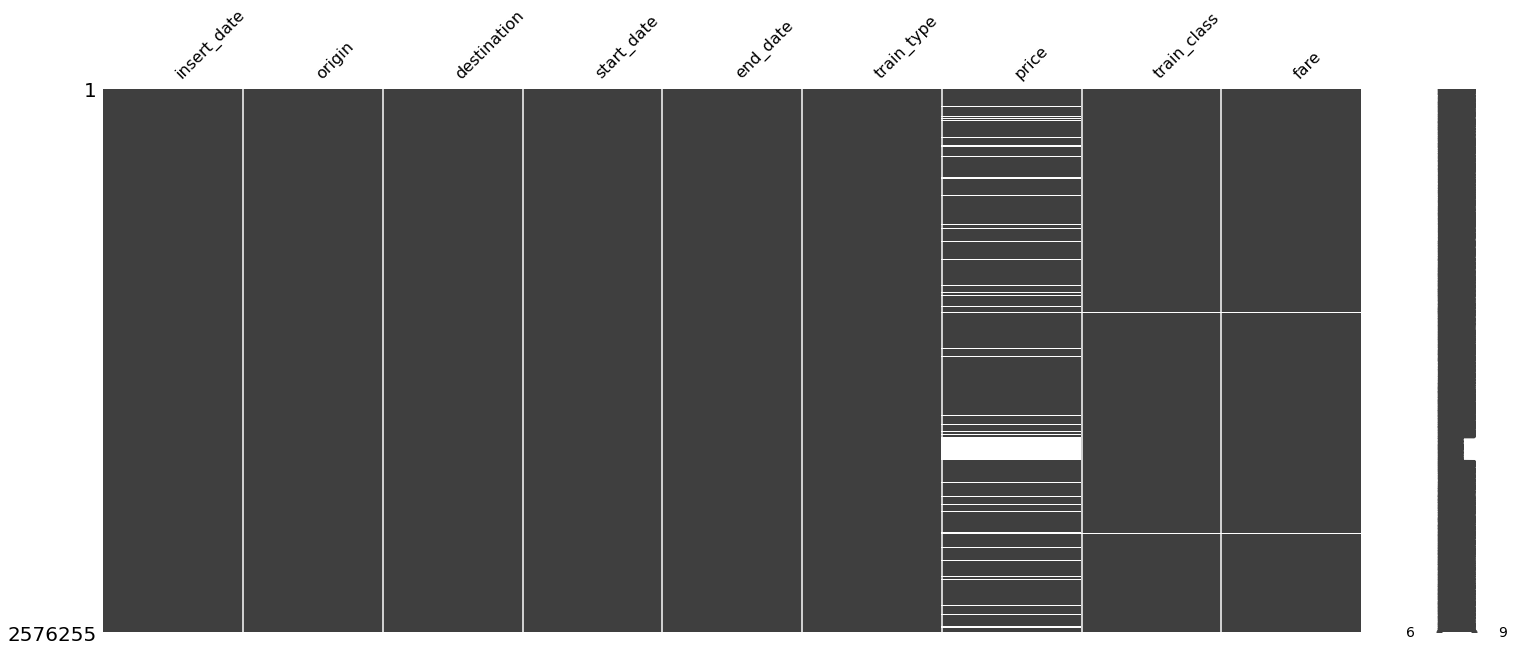

In [12]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(dataset)
plt.show()

จากรูปด้านบนเส้นขีดขาวคือช่วงที่ปรากฏ missing values ซึ่งจะเห็นว่า ที่คอลัมน์ price จะมี missng values มากที่สุด

ลำดับถัดมาเราจะมาจัดการกับ missing value โดยใช้ dropna()

In [13]:
dataset = dataset.dropna(subset=["price","train_class","fare"]) #subset : column that need to detect missing value 

หลังจากที่เราลบ missing value ออกแล้ว จะเหลือ แถวทั้งหมด 2266504 แถว จากก่อนหน้านี้มีทั้งหมด 2576255 ซึ่งจำนวนที่หายไป 309751 แถว

In [14]:
2576255-2266504 #before_dropna - after_dropna

309751

ทำการเช็ค missing value อีกรอบ 

In [15]:
print(dataset.isna().sum())
print("Remain",dataset.shape )
print("This method reduce the dataset:" ,(100-(2266504*100)/2576255),"%")

insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64
Remain (2266504, 9)
This method reduce the dataset: 12.02330514642378 %


ผลลัพธ์ออกมาคือ 0 นั้นคือไม่มีค่า missing value อยู่ใน dataset นี้แล้ว
และจะเห็นว่า แถวที่ถูกตัดไป 309751 แถว คิดเป็น 12.02 เปอเซ็นต์ 

หมายเหตุ : missing value นอกจากการ drop แถวหรือตัดแถวออกนั้น ก็มีวิธีการแบบอื่นอย่างเช่นแทนที่ด้วยค่าเฉลี่ย หรือ แทนด้วยค่า median หรืออาจจะทำ regreesion เพื่อหาค่าเบื้องต้นก่อน แต่ในกรณีนี้จะเห็นได้ว่าข้อมูลนั้นมีขนาดใหญ่การตัดออกไปจึงไม่ค่อยส่งผลมาก และตัวแปร price เป็นค่าที่เราต้องการจะ predict ด้วยซึ่งถ้าเราแทนด้วย mean ก็อาจจะส่งผลต่อการ predict จึงตัดสินใจ drop แถวนั้นๆทิ้งไป

##DateTime columns

ต่อมาเราจะมาจัดการกับคอลัมน์ date-time กันเพราะใน dataset นี้จะมี date-time ทั้งหมด 3 คอลัมน์ insert-date, start-date, end_date

เราจะทำการเช็ค type ของ แต่ละคอลัมน์กันว่ามีส่วนไหนที่จะต้องปรับโดยใช้ info()

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266504 entries, 0 to 2579770
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   insert_date  object 
 1   origin       object 
 2   destination  object 
 3   start_date   object 
 4   end_date     object 
 5   train_type   object 
 6   price        float64
 7   train_class  object 
 8   fare         object 
dtypes: float64(1), object(8)
memory usage: 172.9+ MB


จะเห็นว่าคอลัมน์ insert-date, start-date, end_date ยังเป็น ob่ject อยู่เพราะฉะนั้นจะต้องแปลงเป็นในรูปแบบของ date-time format ก่อนโดยใช้ฟังก์ชั่น to_datetime()

In [17]:
dataset["insert_date"] = pd.to_datetime(dataset["insert_date"])
dataset["start_date"] = pd.to_datetime(dataset["start_date"])
dataset["end_date"] = pd.to_datetime(dataset["end_date"])

หลังจากที่ทำการแปลง date-time เสร็จแล้วเราจะใช้ info() เพื่อเช็ค type อีกที

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266504 entries, 0 to 2579770
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   insert_date  datetime64[ns]
 1   origin       object        
 2   destination  object        
 3   start_date   datetime64[ns]
 4   end_date     datetime64[ns]
 5   train_type   object        
 6   price        float64       
 7   train_class  object        
 8   fare         object        
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 172.9+ MB


ต่อจากนั้นเราจะสังเกตว่าจะมีคอลัมน์ start-date และ end-date ซึ่งมองว่าคอลัมน์นี้สามารถบอกระยะเวลาที่รถไฟออกจนกระทั่งถึงจุดหมายนั้น และอาจจะมีผลต่อการนำไปใช้ในการ predict เพื่อให้โมเดลแม่นยำขึ้นได้ จึงทำการสร้างคอลัมน์ใหม่ total_time คือเวลาเดินทางของรถไฟเป็นหน่วยนาทีออกมา 

In [19]:
dataset["total_time(Min)"] = ((dataset["end_date"] - dataset["start_date"]).dt.seconds)/60 # create new column totaltime = (enddate - startdate)/60 (min)
dataset["total_time(Min)"] = dataset["total_time(Min)"].astype(int) #change type from float to int

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266504 entries, 0 to 2579770
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   insert_date      datetime64[ns]
 1   origin           object        
 2   destination      object        
 3   start_date       datetime64[ns]
 4   end_date         datetime64[ns]
 5   train_type       object        
 6   price            float64       
 7   train_class      object        
 8   fare             object        
 9   total_time(Min)  int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 190.2+ MB


หลังจากที่เราได้ทำการเพิ่มคอลัมน์ไปจะได้ dataframes ดังรูปด้านล่าง

In [21]:
dataset.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,total_time(Min)
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo,176
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo,152
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo,141
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo,152
5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo,158


##EDA

นี้ส่วนนี้เราจะมาทำการ insights ของ dataset ชุดนี้ โดยเริ่มที่คอลัมน์ price ที่เราอยากจะ predict ก่อน

เราจะใช้ .describe() เพื่อดู Descriptive statistics คร่าวของ คอลัมน์ price ที่เราจะ predict ในขั้นต่อไป 

In [22]:
dataset["price"].describe().apply(lambda x: format(x, 'f'))

count    2266504.000000
mean          63.404359
std           25.790848
min           15.450000
25%           43.750000
50%           60.300000
75%           78.800000
max          214.200000
Name: price, dtype: object

ซึ่งจากตารางด้านบนก็สามารถบอกได้ว่าราคาค่าเฉลี่ยของตั๋วรถไฟของข้อมูลชุดนี้อยู่ที่ 63.40 เหรียญ และ ตั๋วที่ราคาถูกที่สุดอยู่ที่ 15.45 เหรียญ และตั๋วที่ราคาแพงที่สุดอยู่ที่ 214.20 เหรียญ โดยมีค่า median อยู่ที่ 60.3 เหรียญ

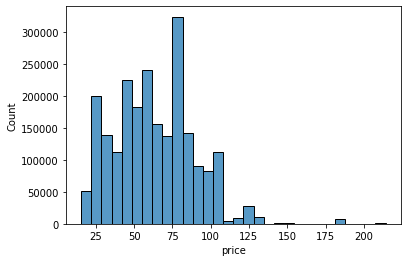

In [23]:
import seaborn as sns
sns.histplot(data=dataset["price"],bins = 30)

กราฟด้านบนก็คือความถี่ของช่วงราคาตั๋วรถไฟ ที่ใช้ library seaborn ในการช่วยพลอตกราฟ

ต่อมาเราจะมาดู insights ของ train_type เมื่อเทียบกับ ราคา และเวลาในการเดินรถ

Text(0, 0.5, 'total_time(min)')

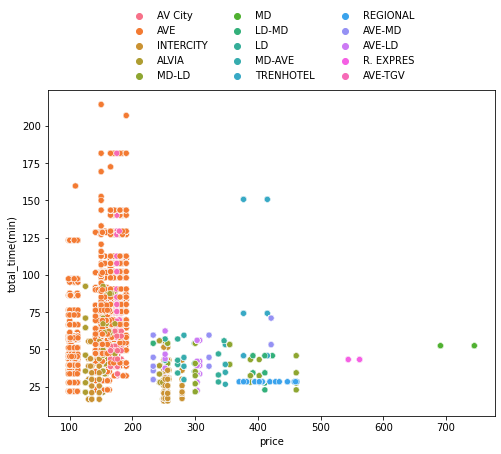

In [24]:
plt.figure(figsize=(8,6))
ax =sns.scatterplot(x="total_time(Min)", y="price",hue="train_type",data=dataset)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1),ncol=3,title=None,frameon=False,)
plt.xlabel("price")
plt.ylabel("total_time(min)")

กราฟด้านบนเราจะกำหนดแกน y ให้เป็น price และ แกน x เป็น ระยะเวลา โดยที่จุดสีคือ train_type อย่างแรกเราจะเห็นได้ว่าระยะทางกับราคานั้นไม่ได้แปรผันตามกัน 
จุดสังเกต

1. train_type ประเภท AVE จุดสีส้มจะมีช่วงราคาที่ค่อนข้างกว้างตั้งแต่ประมาณ 25 จนถึง 200 เหรียญซึ่งมีราคามากที่สุด และรถไฟ AVE จะมีระยะการเดินรถไม่เกิน 200 นาที ซึ่งอาจจะเป็นรถไฟจำพวกความเร็วสูง 

2. train_type ประเภท REGIONAL จุดสีฟ้า จะมีราคาที่ไม่ต่างกันจะอยู่ในช่วงราคา 25 เหรียญ

3. train_type ประเภท LD และ LD-MD จะมีระยะการเดินรถมากกว่า 200 นาที หรือ 3 ชม 20 นาที 



ต่อมาเราจะทำการเทียบ total-time กับ price โดยที่แต่ละจุดบ่งบอกถึง train_class 

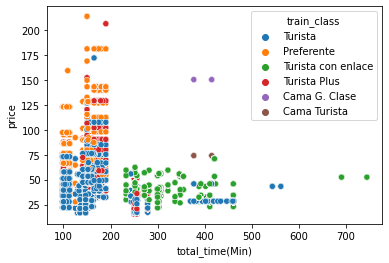

In [25]:
sns.scatterplot(x="total_time(Min)", y="price",hue="train_class",data=dataset)

ข้อสังเกต 

1. train class แบบ Prefernte จะมีช่วงเวลาการเดินรถต่ำในช่วง 100 ถึง 200 นาที แต่ก็มีช่วงราคาที่กว้างตั้งแต่สูงสุดมากกว่า 200 เหรียญ และต่ำสุดถึงประมาณ 25 เหรียญ

2. train class ประเภท turista กับ train_type ประเภท REGIONAL มีความเกี่ยวข้องกันสังเกตได้จากจุดสีน้ำเงินช่วง 350 ถึง 450 นาที แสดงว่ารถไฟประเภท REGIONAL จะเป้น class แบบ turista ทั้งหมด

3. เราสามารถบอกได้ว่า train_class ประเภท Preferente อาจจะเป็นรถไฟประเภทชั้น 1 และ Turista เป็นรถไฟประเภทชั้น 2 จากช่วงราคาของ turista ที่ต่ำกว่า preferente

ต่อมาเราจะทำการเทียบ total-time กับ price โดยที่แต่ละจุดบ่งบอกถึง fare

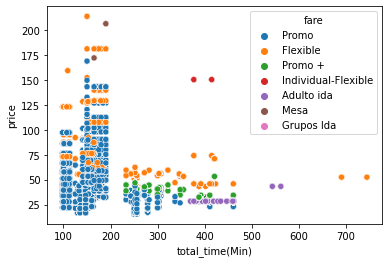

In [26]:
sns.scatterplot(x="total_time(Min)", y="price",hue="fare",data=dataset)

ข้อสังเกต 
1. ประเภทค่าโดยสารแบบ Adulto ida ส่วนใหญ่จะมาจาก train_type ประเภท REGIONAL
2. ประเภทค่าโดยสารแบบ Promo+ จะขายอยู่ในช่วงระยะเวลาการเดินรถ ตั้งแต่ 200 ถึง 450  

ต่อจากนั้นเราจะมาทำการพลอต boxplot เพื่อดูการกระจายตัวของข้อมูล

อย่างแรกเราจะดู train_type ของแต่ประเภทเมื่อเทียบกับ price

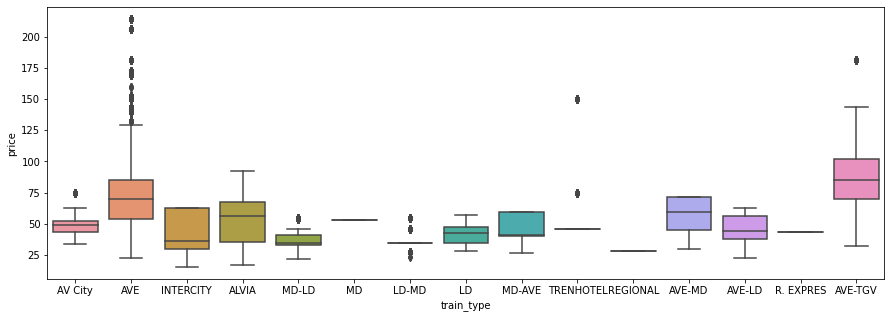

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "train_type", y = "price", data = dataset, )
plt.show()

จะเห็นว่า AVE นั้นจะมีช่วงของราคากว้างสุดตามที่กล่าวไป และ REGIONAL จะมี ราคาที่เฉลี่ยต่ำที่สุดในบรรดา train type ทั้งหมด และมีเพียงราคาเดียว  

ต่อมาดู train_class ของแต่ประเภทเมื่อเทียบกับ price

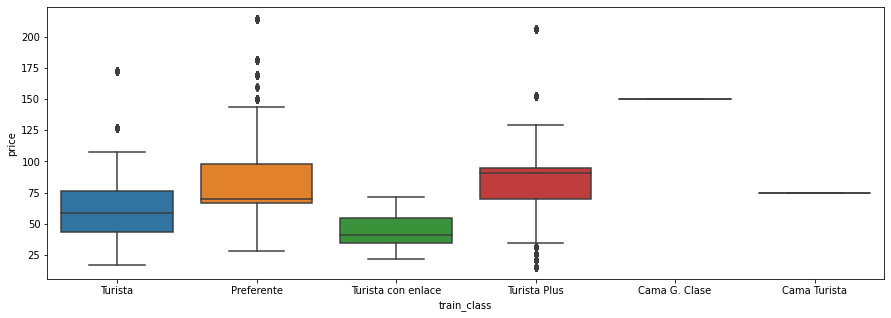

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "train_class", y = "price", data = dataset, )
plt.show()

จะเห็นว่าค่าราคามากสุดจะอยู่ใน train class ประเภท Preferente และราคาต่ำที่สุดจะอยู่ใน Turista Plus แต่ train classs ประเภท Turista con enlace จะมีค่า ทำ medain ของราคาที่ต่ำกว่าตัวอื่นๆ ซึ่งถ้าจากการสังเกต train class ที่เป็น Turista อาจจะเป็นรถไฟประเภท ชั้น1 และ Prefernte จะเป็นรถไฟประเภทชั้น 2

ต่อมาดู fare ของแต่ประเภทเมื่อเทียบกับ price

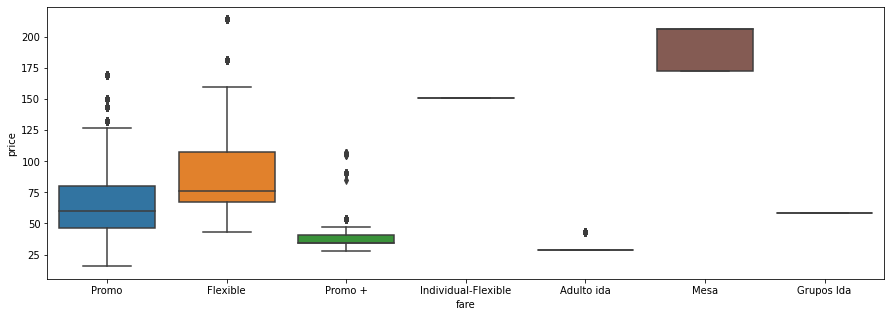

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "fare", y = "price", data = dataset)
plt.show()

ตั๋วโดยสารประเภท Adulto ida จะมีค่าเฉลี่ยราคาถูกที่สุด และตั๋วแบบ Mesa จะมีช่วงของราคาที่แพงกว่าตัวอื่นๆ 

ต่อมาเราจะใช้คำสั่ง groupby เพื่อที่จะสร้างตารางผลสรุปค่าเฉลี่ย จากการนำเอาข้อมูลทั้ง train_type, train_class และ fare มาทำการ group กัน 

In [30]:
dataset_mean = dataset[["train_type","train_class","fare","price"]]
check_mean = dataset_mean.groupby(["train_type","train_class","fare"], as_index=False)["price"].mean() 
check_mean.sort_values(by="price") # sort the value fron lower to upper 

,train_type,train_class,fare,price
39,LD-MD,Turista con enlace,Promo,27.284375
46,MD-LD,Turista con enlace,Promo,28.179902
49,REGIONAL,Turista,Adulto ida,28.350000
32,INTERCITY,Turista,Promo,29.042205
34,INTERCITY,Turista Plus,Promo,29.435988
43,MD-AVE,Turista con enlace,Promo,29.440000
47,MD-LD,Turista con enlace,Promo +,33.695970
36,LD,Turista con enlace,Promo,34.104030
40,LD-MD,Turista con enlace,Promo +,34.350000
23,AVE-MD,Turista con enlace,Promo,35.390909


จากตารางด้านบนเราได้ทำการเรียงลำดับราคาจากน้อยไปหามากแล้ว จะเห็นว่า รถไฟประเภท LD-MD, Turista, con enlace, Promo มีค่าเฉลี่ยน้อยที่สุด	27.284375  และรถไฟประเภท AVE	Turista Plus	Mesa	มีค่าเฉลี่ยมากสุด 206.800000 

##Create predictive model

ในส่วนนี้เราจะมาจัดเตรียมตารางให้พร้อมสำหรับการทำ predictive model 

In [31]:
dataset.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,total_time(Min)
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo,176
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo,152
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo,141
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo,152
5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo,158


จากรูปตารางด้านบนเราจะทำการตัด insert date ไปเพราะเป็นข้อมูลที่เป็นค่าคงที่ เป็นเพียงเวลาทำการใส่ข้อมูลลงในระบบ จึงไม่ได้นำมาคิด และตัดในส่วนของ start_date และ end_date ออก เพราะเราได้ทำการแปลงเป็นระยะเวลาแล้ว ในคอลัมน์ total_time

In [32]:
df = dataset.drop(columns=["insert_date","start_date","end_date"]) # drop = remove the data which not use.

หลังจากทำการ drop หรือ ลบคอลัมน์ที่ไม่ใช้ออกแล้วจะได้ตารางดังรูปด้านล่าง

In [33]:
df.head()

,origin,destination,train_type,price,train_class,fare,total_time(Min)
0,MADRID,SEVILLA,AV City,38.55,Turista,Promo,176
1,MADRID,SEVILLA,AVE,53.40,Turista,Promo,152
2,MADRID,SEVILLA,AVE,47.30,Turista,Promo,141
3,MADRID,SEVILLA,AVE,69.40,Preferente,Promo,152
5,MADRID,SEVILLA,AVE,60.30,Turista,Promo,158


ต่อจากนั้นเราทำการย้ายคอลัมน์ y ให้ไปอยู่ในคอลัมน์สุดท้ายของตารางเพื่อให้ง่ายต่อการจัดการและทำโมเดล pridictive 

In [34]:
price = df["price"]
df.drop(labels=["price"], axis=1, inplace=True)
df.insert(6,"price",price) #insert the new row at column 6
df.head()

,origin,destination,train_type,train_class,fare,total_time(Min),price
0,MADRID,SEVILLA,AV City,Turista,Promo,176,38.55
1,MADRID,SEVILLA,AVE,Turista,Promo,152,53.40
2,MADRID,SEVILLA,AVE,Turista,Promo,141,47.30
3,MADRID,SEVILLA,AVE,Preferente,Promo,152,69.40
5,MADRID,SEVILLA,AVE,Turista,Promo,158,60.30


จากนั้นทำการแยก X ก็คือ Feature หรือ independent variable ออกจาก y ก็คือ price ที่ต้องการใช้ prediction ซึ่งเรียกว่า dependent variable

In [35]:
X = df.iloc[:, :-1].values #X mean feature column that include origin, destination, train_type, train_class, fare and total_time(Min) 
y = df.iloc[:, -1].values #y mean target or label that need to predict 

ทำการแสดงค่า X และ ค่า y

In [36]:
print(X)

[['MADRID' 'SEVILLA' 'AV City' 'Turista' 'Promo' 176]
 ['MADRID' 'SEVILLA' 'AVE' 'Turista' 'Promo' 152]
 ['MADRID' 'SEVILLA' 'AVE' 'Turista' 'Promo' 141]
 ...
 ['MADRID' 'SEVILLA' 'AVE' 'Turista Plus' 'Promo' 141]
 ['MADRID' 'SEVILLA' 'AVE' 'Turista' 'Flexible' 160]
 ['MADRID' 'SEVILLA' 'AV City' 'Turista' 'Promo' 165]]


In [37]:
print(y)

[38.55 53.4  47.3  ... 72.3  76.3  49.15]


### One-Hot Encoding

เนื่องจากชุดข้อมูลที่ให้มามีหลายคอลัมน์ที่เป็นแบบ category ซึ่งการที่เราจะทำการ predict ได้นั้นเราจะต้องเปลี่ยนทุกคอลัมน์ให้เป็นในรูปแบบ numeric ก่อน โดยการทำ one hot encoding จะทำการสร้างคอลัมน์ใหม่ขึ้นมา เพื่อแทนลักษณะเฉพาะของแต่ละตัวในคอลัมน์นั้นๆและจะให้ค่านั้นเป็น 1 ของคอลัมน์นั้นๆเมื่อมีการตรวจสอบเจอ

เราจะใช้ library ของ scikit-learn ที่ชื่อว่า ColumnTransformer ในการแปลงและปรับเปลี่ยนค่าในชุดข้อมูลและใช้ OneHotEncoder ในการทำ One-hot encoding

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[0,1,2,3,4])], remainder = 'passthrough') #transformer is specify column which want to encoder, remainder, remainder = "passthrough" mean you want to keep another column that not applie for encoding
X = ct.fit_transform(X).toarray() #fit_transform method will return output the new matrix 

หลังจากเราได้ทำ one-hot เสร็จแล้วเราจะแสดงผลลัพธ์ของ X 

In [39]:
print(X)

[[  0.   1.   0. ...   1.   0. 176.]
 [  0.   1.   0. ...   1.   0. 152.]
 [  0.   1.   0. ...   1.   0. 141.]
 ...
 [  0.   1.   0. ...   1.   0. 141.]
 [  0.   1.   0. ...   0.   0. 160.]
 [  0.   1.   0. ...   1.   0. 165.]]


X ที่ออกมาจะอยู่ในรูป binary object หรือ 0 และ 1 ตามตารางด้านบน

In [40]:
X.shape

(2266504, 39)

จะเห็นได้ว่าหลังจากที่เราทำ One-Hot encoding จะทำมีคอลัมน์เพิ่มจากการวร้าง dummy variables จนทำให้คอลัมน์ตอนนี้มีทั้งหมด 39 คอลัมน์

##Splitting the dataset into the Training set and Test set

ในขั้นต่อไปเราจะทำการแบ่ง train set และ test set ของข้อมูล ซึ่งเราจะแบ่งให้ test set มีจำนวน 20% ของข้อมูล และ train set 80% โดยที่เราจะใช้ random_state = 1

In [41]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1 )

หลังจากเราแบ่ง train set และ test set แล้ว จะทำให้มีตัวแปรที่เกิดขึ้นใหม่ X_train, X_test, y_train, y_test

###Feature scaling 

ในขั้นตอนต่อมาเราจะทำการ scaling ข้อมูลให้อยู๋ในช่วงเดียวกันเพื่อไม่ให้การทำ predict นั้นมีค่าน้ำหนักในการ predict ไม่แตกต่างกันเกินไปในทุกคอลัม ยกตัวอย่างเช่นคอลัม total time นั้นมีค่าอยู่ในหลักร้อย เมื่อเทียบกับคอลัมน์อื่นๆที่ถูกแปลงเป็น one-hot จะอยู๋ในหลักหน่วย ซึ่งเมื่อเรา predict อาจจะทำให้การทำนายไปให้น้ำหนักกับ total time มากเกินไป 

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #standardscalar = (value-mean)/stdev
X_train[:, :] = sc.fit_transform(X_train[:, :]) # select all column of X_train
X_test[:, :] = sc.transform(X_test[:, :]) # select all column of X_test

เมื่อเราทำการแปลงคอลัมน์ทุกคอลัมน์ของ X_train และ X_test แล้วจะมีหน้าตาตามตารางด้านลาง

In [43]:
X_train

array([[-0.4605798 ,  0.96412164, -0.18011413, ...,  0.67136825,
        -0.17575128, -0.37253288],
       [-0.4605798 ,  0.96412164, -0.18011413, ...,  0.67136825,
        -0.17575128, -0.80937388],
       [-0.4605798 ,  0.96412164, -0.18011413, ...,  0.67136825,
        -0.17575128, -0.88048753],
       ...,
       [-0.4605798 ,  0.96412164, -0.18011413, ...,  0.67136825,
        -0.17575128, -0.39285107],
       [ 2.17117642, -1.03721352, -0.18011413, ...,  0.67136825,
        -0.17575128,  0.01351265],
       [-0.4605798 , -1.03721352, -0.18011413, ...,  0.67136825,
        -0.17575128,  0.68401278]])

เสร็จสิ้นขั้นตอนการเตรียม data สำหรับ train และ test โมเดล

## Training Regression model on the dataset

ในส่วนนี้จะเป็นการ train และ test ผลลัพธ์ของแต่ละโมเดลออกมา

###Multiple Linear Regrssion

โมเดลแรกที่เราจะใช้คือ Multiple Linear Regreesion เป็นรูปแบบที่ใช้ในการทำนายค่าที่เป็น continuous value โดยที่มีข้อกำหนดว่ามีหลายตัวแปรที่อยู่ใน features  โดยจะประยุกต์จากสมการเส้นตรง

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

หลังจากที่เราได้ทำการ fit method ของ X_train และ y_train แล้ว ผลที่ได้เราจะมาทำให้อยู่ในรูปของ y_pred และ ทำการจัดปรับเพื่อนำไปเปรียบเทียบกับ y_test นั้นก็คือค่าคำตอบจริง

In [45]:
y_pred = regressor.predict(X_test) 
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis = 1)) # reshape data from horizontal axis to vertical axis and combine to array by use concatenate 

[[ 41.31  39.45]
 [ 79.69  88.95]
 [ 80.03  76.3 ]
 ...
 [ 41.51  27.8 ]
 [ 49.38  60.3 ]
 [108.36 107.7 ]]


จากตารางด้านบนจะเห็นบรรทัดแรก ค่า y_pred ที่เราทำนายได้ 41.31 และค่า y_test คือคำตอบจริงได้ 39.45 ซึ่งมีค่าที่ใกล้เคียงกันอยู่พอสมควร แต่ก็จะมีบางช่วงที่แตกต่างกันมากอย่างบรรทัดที่สามจากสุดท้าย ค่า y_pred ที่เราทำนายได้ 41.51 และค่า y_test คือคำตอบจริงได้ 27.8 แต่โดยส่วนใหญ่แล้วค่าใกล้เคียงกัน

ลำดับถัดมาเราจะมาหา R-square และ RMSE เพื่อใช้ในการบอกประสิทธิภาพของโมเดลนี้

In [46]:
from sklearn.metrics import r2_score, mean_squared_error
print("R-square :",r2_score(y_test, y_pred))
print("RMSE :", mean_squared_error(y_test, y_pred, squared = False))

R-square : 0.8265300559821316
RMSE : 10.760795513270336


จากผลลัพธ์ที่ได้
R-square เท่ากับ 0.82653 หรือ 82.653% และ Root mean square error(RMSE) เท่ากับ 10.76 ซึ่งถือว่าน่าพอใจในระดับหนึ่ง ซึ่งเราลองไปเปรียบเทียบกับโมเดลถัดไป

###Decisiton tree

โมเดลต่อมาที่เราจะใช้คือ Decisition tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # reshape data from horizontal axis to vertical axis and combine to array by use concatenate 

[[ 41.12  39.45]
 [ 86.45  88.95]
 [ 76.3   76.3 ]
 ...
 [ 41.35  27.8 ]
 [ 54.22  60.3 ]
 [107.7  107.7 ]]


จากตารางด้านบนจะเห็นบรรทัดแรก ค่า y_pred ที่เราทำนายได้ 41.12 และค่า y_test คือคำตอบจริงได้ 39.45 ซึ่งมีค่าที่ได้ดูจะใกล้เคียงกว่า multiple regression  ซึ่งโดยส่วนใหญ่แล้วค่าใกล้เคียงกัน

In [51]:
from sklearn.metrics import r2_score, mean_squared_error
print("R-square :",r2_score(y_test, y_pred))
print("RMSE :", mean_squared_error(y_test, y_pred, squared = False))

R-square : 0.8828531937911731
RMSE : 8.842956443265795


ผลลัพธ์ของ Decision trees ที่ได้ R-square เท่ากับ 0.8828531 หรือ 88.2853% และ Root mean square error(RMSE) เท่ากับ 8.84 จากผลลัพธ์มีความแม่นยำมากกว่า multiple regression 

###Random Forest

ในส่วนนี้จะใช้ random forest ในการทำนาย โดยเราจะกำหนด จำนวนของต้นไม้ที่ 10 (n_estimators = 10)

In [52]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [53]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # reshape data from horizontal axis to vertical axis and combine to array by use concatenate 

[[ 41.15  39.45]
 [ 86.45  88.95]
 [ 76.3   76.3 ]
 ...
 [ 41.32  27.8 ]
 [ 54.22  60.3 ]
 [107.7  107.7 ]]


จากตารางด้านบนจะเห็นบรรทัดแรก ค่า y_pred ที่เราทำนายได้ 41.15 และค่า y_test คือคำตอบจริงได้ 39.45 ซึ่งมีค่าที่ได้ดูจะใกล้เคียงกัน และส่วนค่าส่วนใหญ่ก็ดูใกล้เคียงกัน


In [54]:
from sklearn.metrics import r2_score, mean_squared_error
print("R-square :",r2_score(y_test, y_pred))
print("RMSE :", mean_squared_error(y_test, y_pred, squared = False))

R-square : 0.8828473959817771
RMSE : 8.843175267590894


ผลลัพธ์ของ random forest ที่ n_esitmators เท่ากับ 10 ได้ R-square เท่ากับ 0.882847 หรือ 88.2847% และ Root mean square error(RMSE) เท่ากับ 8.84 จากผลลัพธ์มีความแม่นยำมากกว่า multiple regression แต่น้อยกว่า decision trees


จากช่วงต้นเราใช้ random forest ในการทำนาย โดยเราจะกำหนด จำนวนของต้นไม้ที่ 10 ในส่วนถัดมาเราจะลองเพิ่มจำนวนต้นไม้จาก 10 เป็น 1000 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # reshape data from horizontal axis to vertical axis and combine to array by use concatenate 

[[ 41.13  39.45]
 [ 86.45  88.95]
 [ 76.3   76.3 ]
 ...
 [ 41.35  27.8 ]
 [ 54.22  60.3 ]
 [107.7  107.7 ]]


จากตารางด้านบนจะเห็นบรรทัดแรก ค่า y_pred ที่เราทำนายได้ 41.13 และค่า y_test คือคำตอบจริงได้ 39.45 ซึ่งมีค่าที่ได้ดูจะใกล้เคียงกัน และส่วนค่าส่วนใหญ่ก็ดูใกล้เคียงกัน

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("R-square :",r2_score(y_test, y_pred))
print("RMSE :", mean_squared_error(y_test, y_pred, squared = False))

R-square : 0.8828529192605623
RMSE : 8.842966804883368


ผลลัพธ์ของ random forest ที่ n_esitmators เท่ากับ 100 ได้ R-square เท่ากับ 0.882852 หรือ 88.2852% และ Root mean square error(RMSE) เท่ากับ 8.8429 จากผลลัพธ์มีความแม่นยำมากกว่า multiple regression และrandom forest แบบที่กำหนดค่า n_estimators = 10  แต่น้อยกว่า decision trees ทำให้เห็นว่าการปรับ n_estimators มากขึ้นจะทำโมเดลนั้นมี error และ R-square ที่ดีขึ้น

### ANN artificial_neural_network

ต่อมาเราจะมาลองใช้ neural network ในการทำนาย

เราจะใช้ library tensorflow 

In [ ]:
import tensorflow as tf

เราจะต้อง innitialze เพื่อสร้าง sequence ของ layer โดยใช้ model.Sequentail()

In [ ]:
ann = tf.keras.models.Sequential()

การทำงานของ neural network จะเปรียบเสมือนเครือข่าย มีสามส่วนหลักคือ input layer ค่าที่ใ่สเข้าไป และ Hidden layer คือส่วนของการคำนวณ และ output layer คือผลลัพธ์หรือค่าที่ทำการทำนาย ในที่นี้เราจะสร้าง 2 layers แล้วในแต่ละ layer เราจะกำหนดให้มี 40 neural โดยเราจะเลือกใช้ activate function แบบ rectifier ที่เหมาะสำหรับโมเดลประเภท regression 

สร้าง hiddle layer ที่ 1

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='relu'))

สร้าง hiddle layer ที่ 2

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='relu')) 

สร้าง output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1))

หลังจากที่เราสร้างเสร็จเราจะ complie ด้วย adam optimizer ซึ่งเป็นการทำงานในรูปแบบ Stochastic Gradient Descent  และ เลือก loss ให้ขึ้นอยู่กับ RMSE หรือ Root Mean Square Error

In [ ]:
ann.compile(optimizer = "adam", loss = 'mean_squared_error') #adam = Stochastic Gradient Descent

จากนั้นเราจะทำการ fit method ด้วยการกำหนด batch size ที่ 32 นั้นหมายความว่าแต่ละรอบการทำงานจะทำงาน 32 แถวแล้วไปเรื่อยๆ และตั้ง epochs เท่ากับ 100 นั้นก็คือให้มีการวนครบหมดเป็นจำนวน 100 รอบ

In [ ]:
ann.fit(X_train,y_train, batch_size = 32, epochs = 100)

Epoch 1/100
56663/56663 [==============================] - 99s 2ms/step - loss: 102.5497
Epoch 2/100
56663/56663 [==============================] - 98s 2ms/step - loss: 87.8476
Epoch 3/100
56663/56663 [==============================] - 98s 2ms/step - loss: 86.0300
Epoch 4/100
56663/56663 [==============================] - 97s 2ms/step - loss: 85.3707
Epoch 5/100
56663/56663 [==============================] - 101s 2ms/step - loss: 84.8981
Epoch 6/100
56663/56663 [==============================] - 100s 2ms/step - loss: 84.4523
Epoch 7/100
56663/56663 [==============================] - 99s 2ms/step - loss: 84.0038
Epoch 8/100
56663/56663 [==============================] - 100s 2ms/step - loss: 83.8311
Epoch 9/100
56663/56663 [==============================] - 98s 2ms/step - loss: 83.5412
Epoch 10/100
56663/56663 [==============================] - 97s 2ms/step - loss: 83.3613
Epoch 11/100
56663/56663 [==============================] - 98s 2ms/step - loss: 83.5040
Epoch 12/100
56663/56663 [

In [ ]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 41.89  39.45]
 [ 86.35  88.95]
 [ 76.33  76.3 ]
 ...
 [ 41.09  27.8 ]
 [ 54.62  60.3 ]
 [107.75 107.7 ]]


จากตารางด้านบนจะเห็นบรรทัดแรก ค่า y_pred ที่เราทำนายได้ 41.89 และค่า y_test คือคำตอบจริงได้ 39.45 ซึ่งมีค่าที่ได้ดูจะใกล้เคียงกัน และส่วนค่าส่วนใหญ่ก็ดูใกล้เคียงกัน

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("R-square :",r2_score(y_test, y_pred))
print("RMSE :", mean_squared_error(y_test, y_pred, squared = False))

R-square : 0.8770322361954708
RMSE : 9.059993729987067


ผลลัพธ์ของ neural network ได้ R-square เท่ากับ 0.87703 หรือ 88.703 % และ Root mean square error(RMSE) เท่ากับ 9.0599 จากผลลัพธ์มีความแม่นยำมากกว่า multiple regression และ แต่น้อยกว่า decision trees และ random forest

##Conclusion 

บทสรุป
1. Multiple linear regression R-square : 0.82653 RMSE : 10.76079
2. Decision trees R-square : 0.88285 RMSE : 8.84295
3. Random forest(n_estimator = 10) R-square : 0.88284 RMSE : 8.84317
4. Random forest(n_estimator = 1000) R-square : 0.88285 RMSE : 8.84296
5. ANN artificial_neural_network R-square : 0.87703 RMSE : 9.05999

จากข้อมูลการทำนายที่ได้สามารถสรุปได้ว่าการทำนายแบบ Decision trees มีความแม่นยำมากสุด และแบบ multiple linear regression มีความแม่นยำน้อยสุด แต่ทั้งนี้เราสามารถทำให้โมเดลแม่นยำขึ้นได้ โดยอาจจะเพิ่ม n_estimator ของโมเดล Random forest ให้มากขึ้น หรืออาจจะ ปรับเพิ่ม hedden layer หรือจำนวน neuron ของ โมเดล ANN ให้มากขึ้น ก็อาจจะเพิ่มประสิทธิภาพความแม่นยำของโมเดลได้ เพียงแต่ทั้งสองวิธีที่กล่าวมานี้ก็อาจจะต้องแลกกับเวลาในการ train ที่สูญเสียไปค่อนข้างมาก หรือเราอาจจะลองใช้โมเดลอื่นๆอย่าง SVM หรือ support vector machine ก็อาจจะให้ผลลัพธ์ที่แตกต่างออกไปได้



ขอบคุณสำหรับ IRPC Data Scientist  challenge ครับ ข้าพเจ้าหวังว่าผู้อ่านจะพอใจไม่มากก็น้อยครับ ขอบคุณครับ

##Reference

- www.scikit-learn.org
- www.seaborn.pydata.org
- www.pandas.pydata.org
- www.geeksforgeeks.org
- www.udemy.com
- www.datacamp.com
- www.medium.com
- www.scipy.org
- www.cmdlinetips.com
